# Atividade 1 - Etapa 3 - Melhores metodologias de aprendizagem clássica

In [1]:
import os
import librosa
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from mpl_toolkits.mplot3d import axes3d

In [2]:
# áudios que temos certeza que são deglutições - 28, 73, 83, 105, 111, 112, 115, 133, 180, 183
a00028 = 'ConsultasDataset/MP3/a00028.mp3'
a00073 = 'ConsultasDataset/MP3/a00073.mp3'
a00083 = 'ConsultasDataset/MP3/a00083.mp3'
a00105 = 'ConsultasDataset/MP3/a00105.mp3'
a00111 = 'ConsultasDataset/MP3/a00111.mp3'
a00112 = 'ConsultasDataset/MP3/a00112.mp3'
a00115 = 'ConsultasDataset/MP3/a00115.mp3'
a00133 = 'ConsultasDataset/MP3/a00133.mp3'
a00180 = 'ConsultasDataset/MP3/a00180.mp3'
a00183 = 'ConsultasDataset/MP3/a00183.mp3'

bons = [os.path.join('ConsultasDataset/MP3/', os.path.basename(a00028)),
        os.path.join('ConsultasDataset/MP3/', os.path.basename(a00073)),
        os.path.join('ConsultasDataset/MP3/', os.path.basename(a00083)),
        os.path.join('ConsultasDataset/MP3/', os.path.basename(a00105)),
        os.path.join('ConsultasDataset/MP3/', os.path.basename(a00111)),
        os.path.join('ConsultasDataset/MP3/', os.path.basename(a00112)),
        os.path.join('ConsultasDataset/MP3/', os.path.basename(a00115)),
        os.path.join('ConsultasDataset/MP3/', os.path.basename(a00133)),
        os.path.join('ConsultasDataset/MP3/', os.path.basename(a00180)),
        os.path.join('ConsultasDataset/MP3/', os.path.basename(a00183))]

In [3]:
import librosa.display

# Carregar o sinal de áudio
y, sr = librosa.load('ConsultasDataset/MP3/a00028.mp3')

# Definir o intervalo de tempo desejado (em segundos)
inicio = 0
fim = 7.5

# Converter o intervalo de tempo para amostras
inicio_amostra = int(inicio * sr)
fim_amostra = int(fim * sr)

# Extrair o intervalo de sinal de áudio
sinal_intervalo = y[inicio_amostra:fim_amostra]

# Calcular o espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(sinal_intervalo)), ref=np.max)

# Plotar o espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()

# Define the x and y coordinates
x = np.arange(D.shape[1])
y = np.arange(D.shape[0])

# Create a meshgrid from the x and y coordinates
X, Y = np.meshgrid(x, y)

# Plot the spectrogram in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, D, cmap='viridis')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_zlabel('Amplitude')
ax.set_title('Spectrogram')

# Show the plot
plt.show()

C:\Users\ferna\AppData\Local\Temp\ipykernel_20744\3866298083.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('ConsultasDataset/MP3/a00028.mp3')
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'ConsultasDataset/MP3/a00028.mp3'

100%|██████████| 10/10 [00:00<00:00, 68.56it/s]


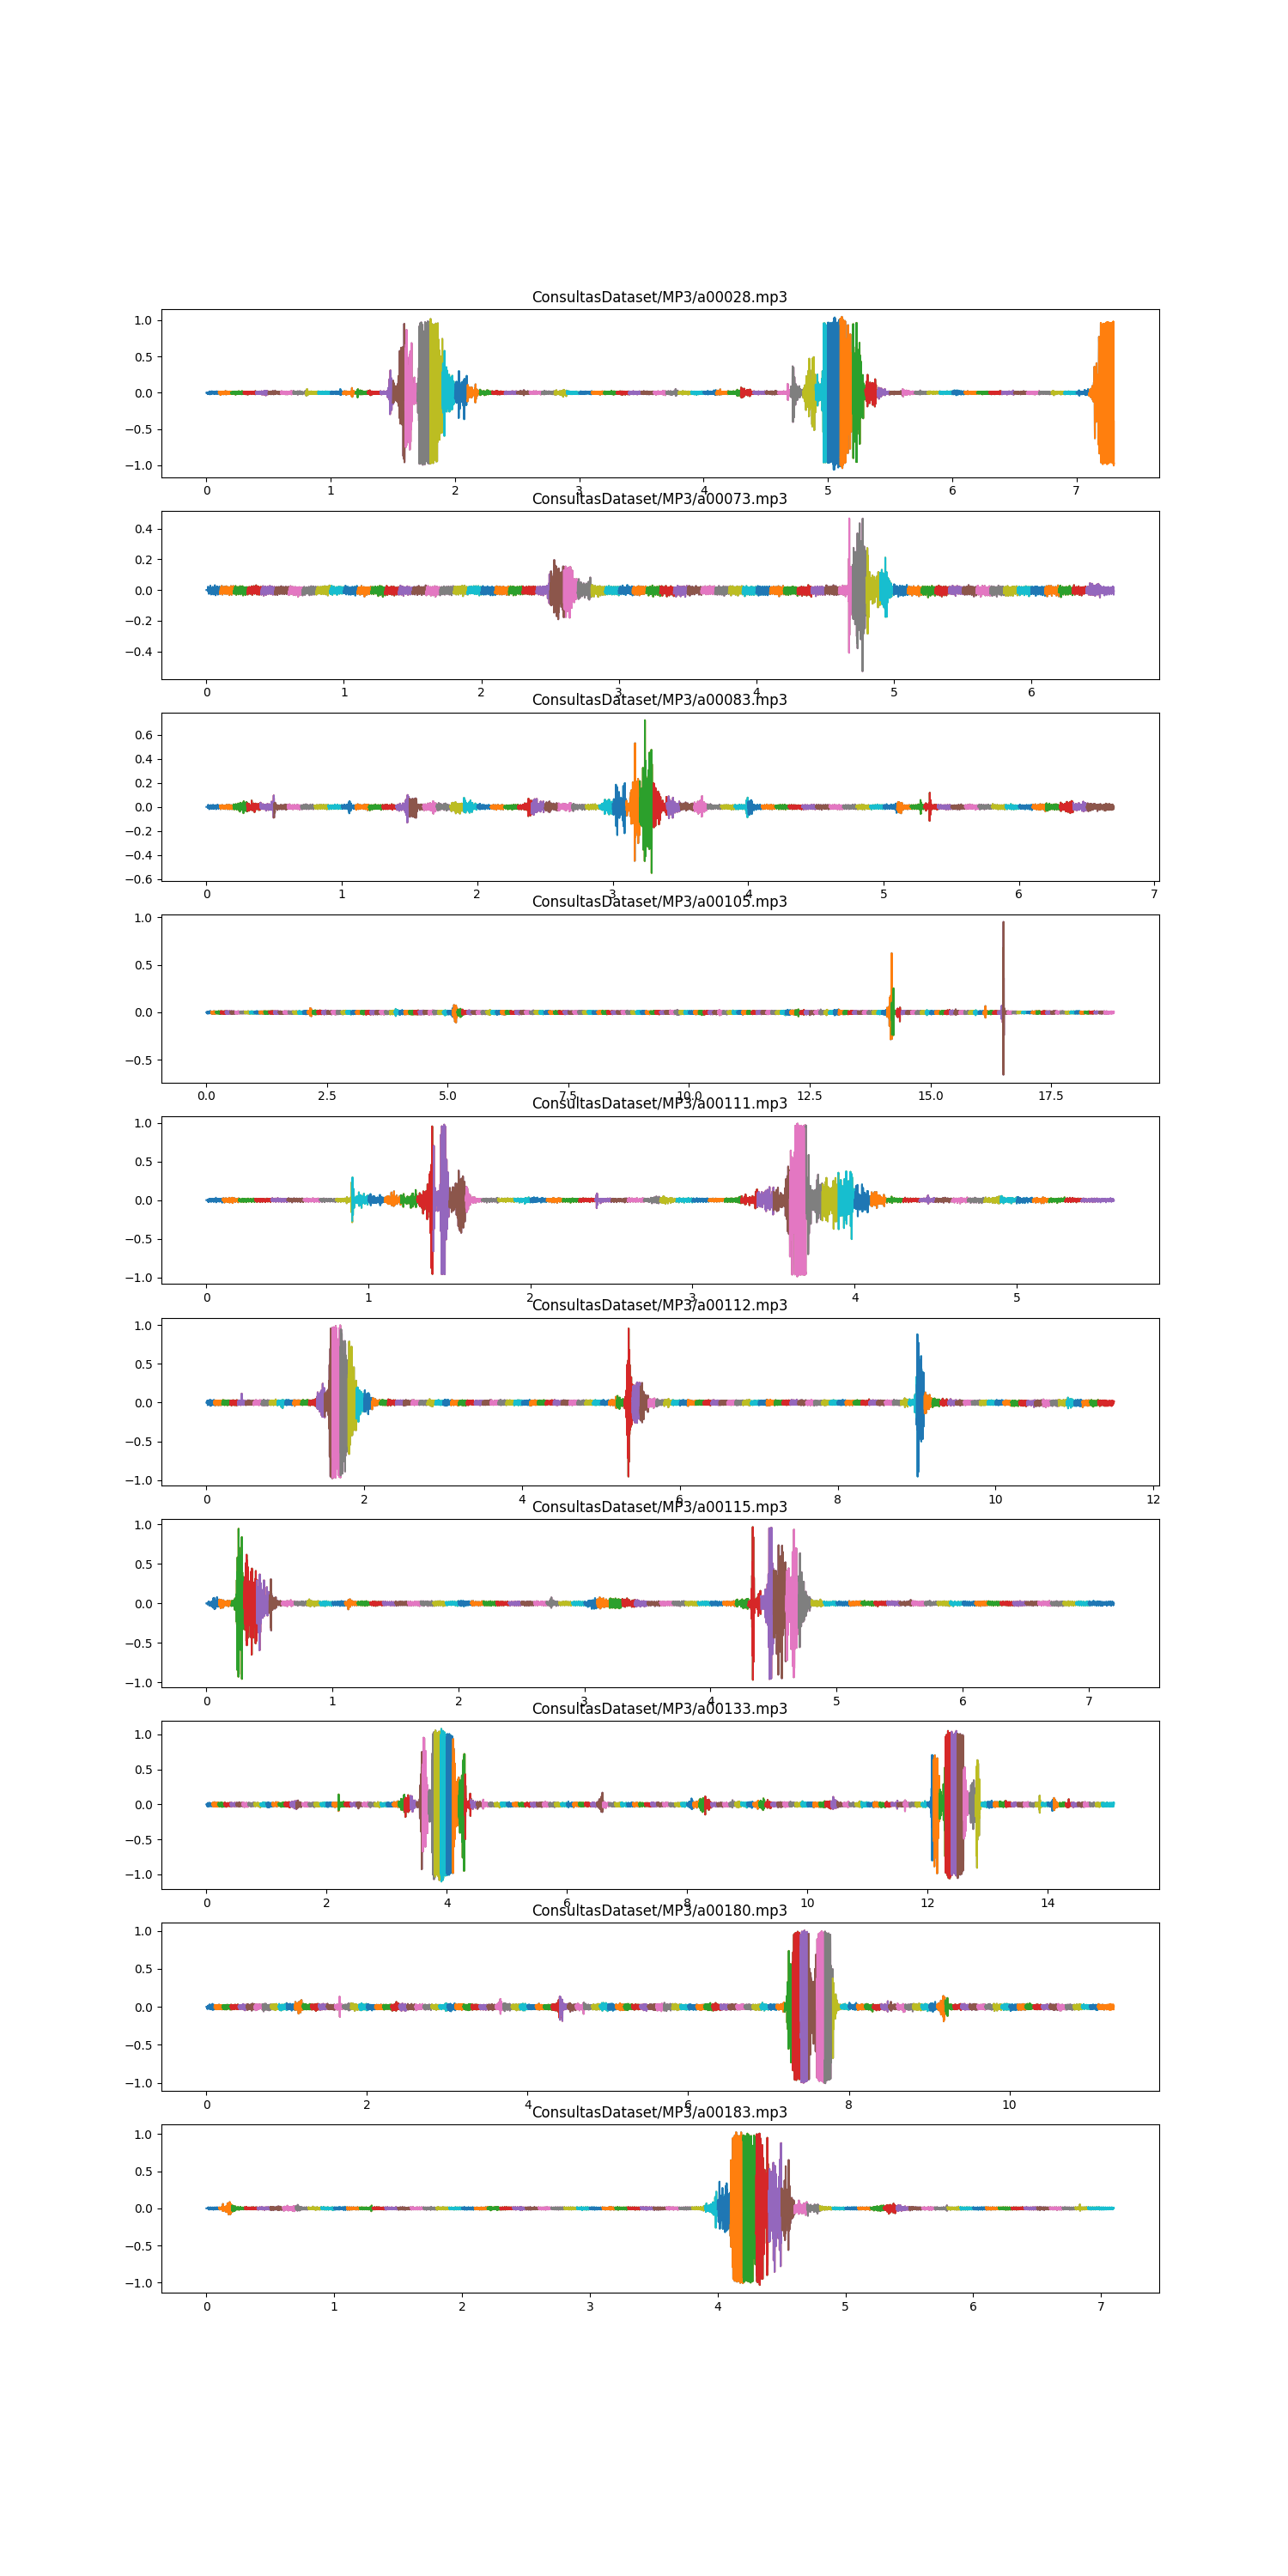

In [ ]:
dados = []
nomes = []

for b in tqdm(bons):
    nome = os.path.basename(b)[:-4]
    y, sr = librosa.load(b)
    x = np.arange(len(y))/sr
  
    janela = int(0.2 * sr)
    passo = int(0.1* sr)
    
    linha = []

    for i in range(0, len(y), int(passo)):
        max = i + janela
        if max > len(y):
            break
        linha.append((x[i:max], y[i:max]))    

    nomes.append(nome)
    dados.append(linha)


fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        ax[i].plot(x, y)
plt.show()

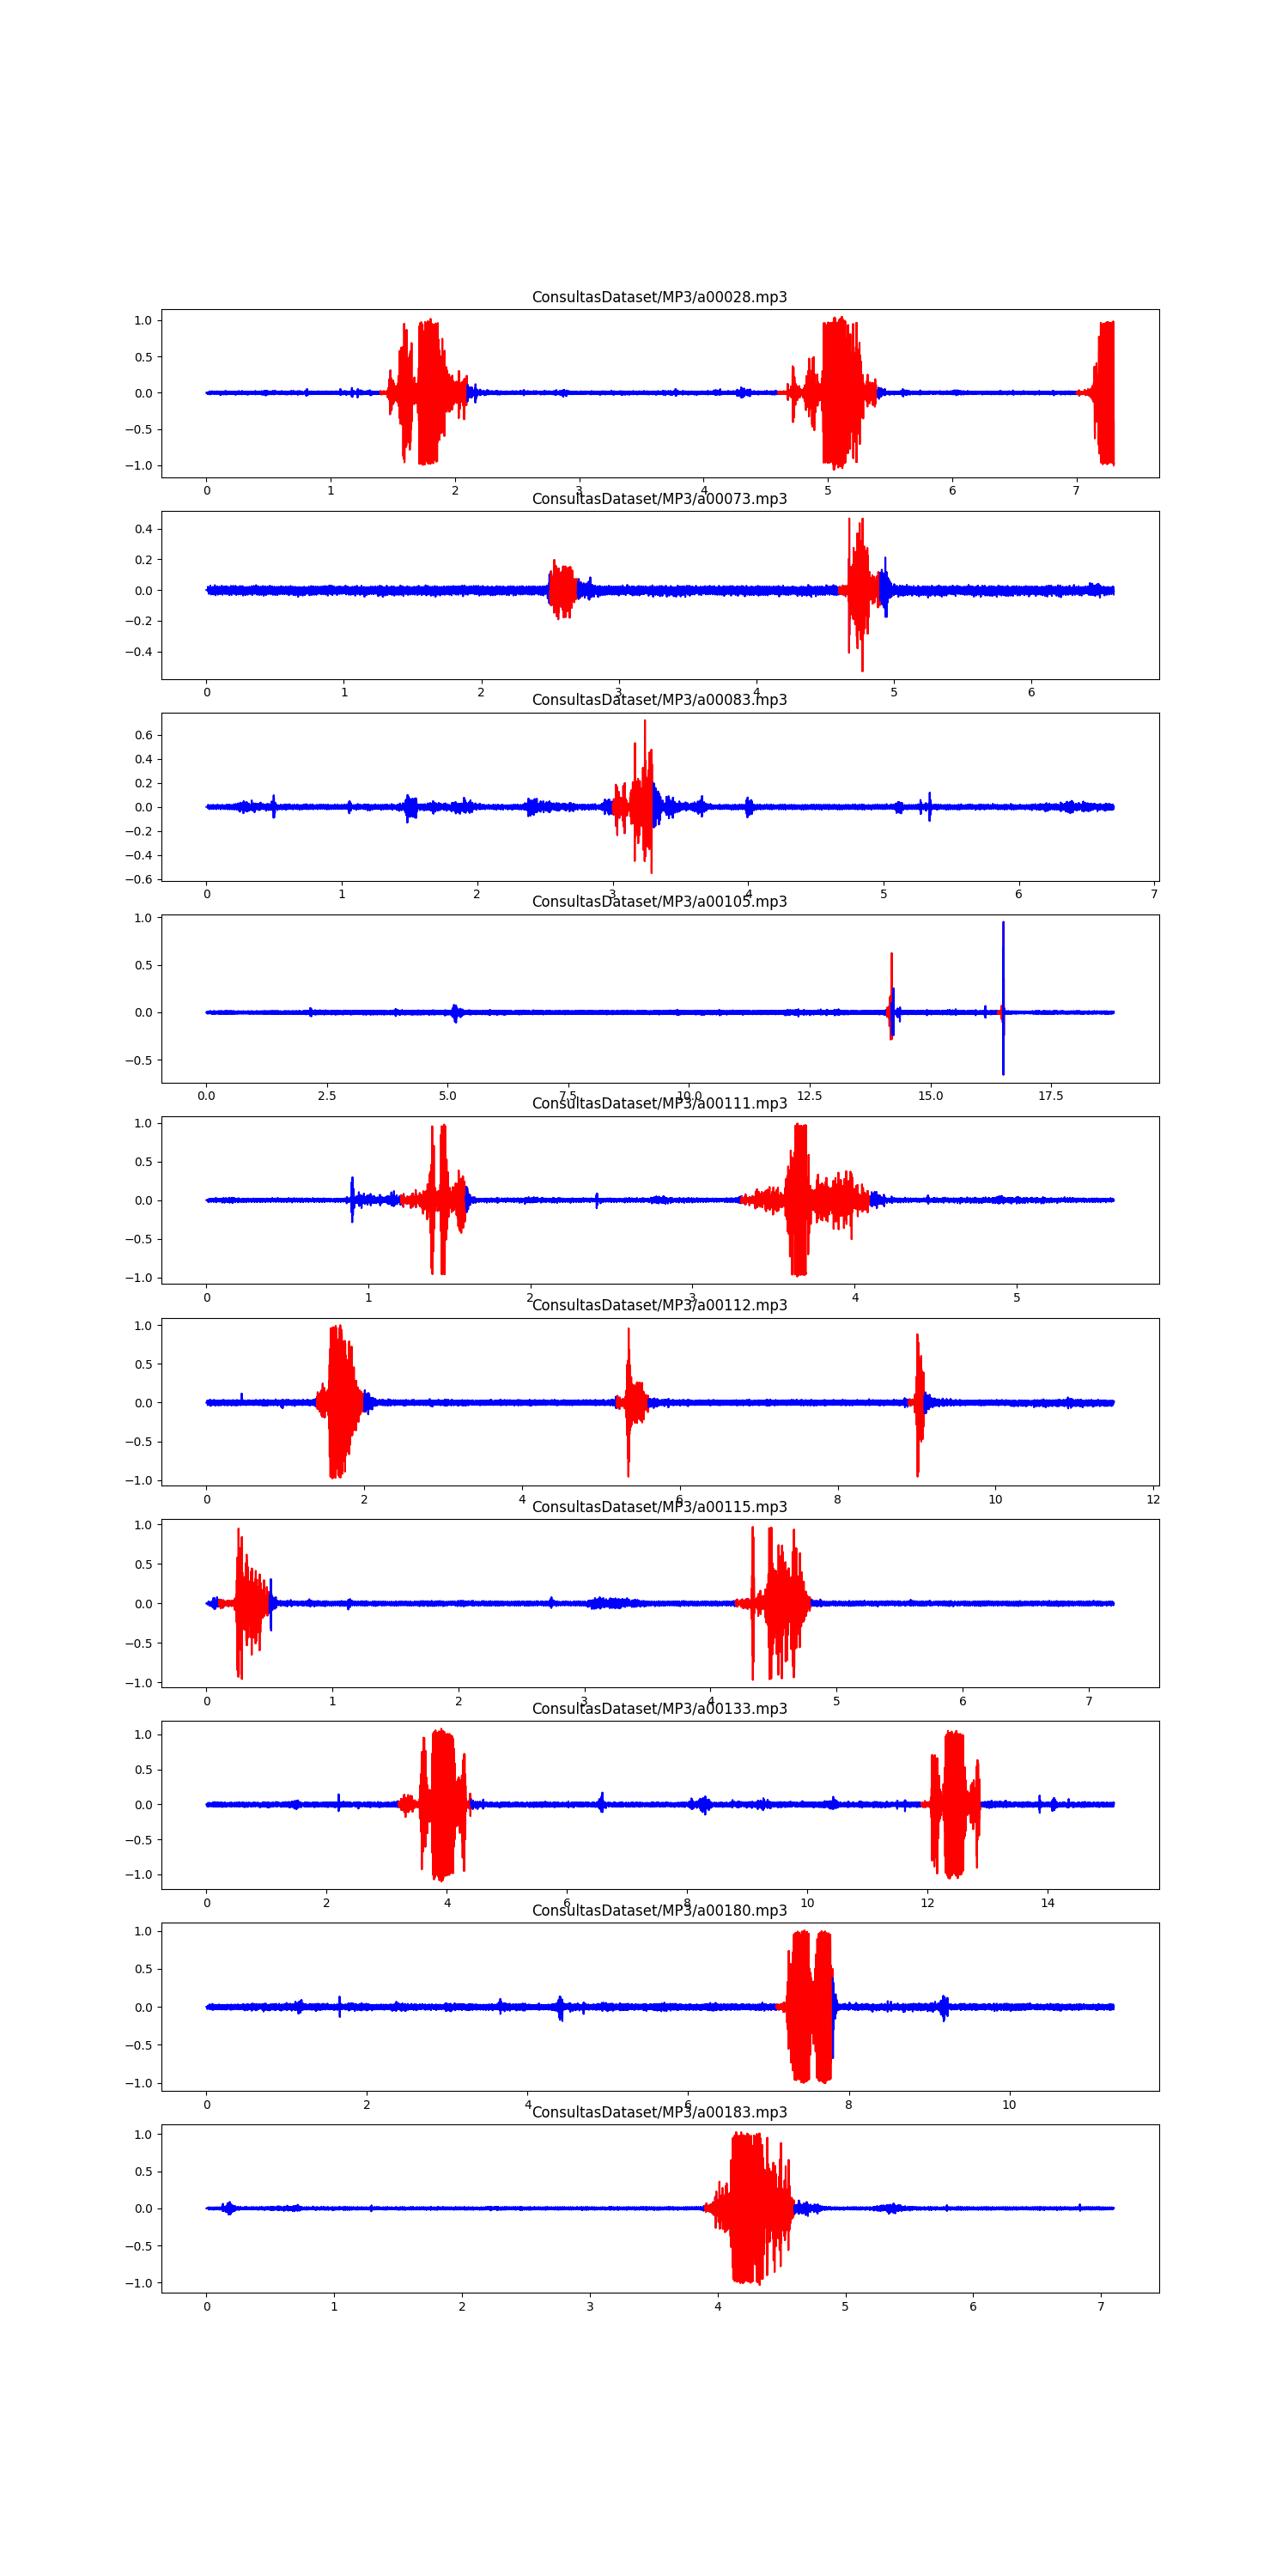

In [ ]:
# detector de anomalias
from sklearn.ensemble import IsolationForest

X = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X.append(y)

clf = IsolationForest(contamination=0.1)
clf.fit(X)
ano = clf.predict(X)
ano = (ano == -1)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color='red' if ano[n] else 'blue')
plt.show()

In [ ]:
# detector de anomalias
import pandas as pd
import warnings
from sklearn.ensemble import IsolationForest
warnings.filterwarnings('ignore')

deteccao = []
count = 0

for linha in tqdm(dados):
    for x, y in linha:        
        #extração espectral
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        flatness = librosa.feature.spectral_flatness(y=y)
        spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
        #extração temporal
        rmse = librosa.feature.rms(y=y)
        zcr = librosa.feature.zero_crossing_rate(y=y)
        #outras extrações
        hpss = librosa.effects.hpss(y=y)
        melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        
        atributos = [nomes[count]]
        # fazer a média dos valore
        atributos.extend(np.mean(mfcc,axis=1))
        atributos.extend(np.mean(spec_cent,axis=1))
        atributos.extend(np.mean(spec_bw,axis=1))
        atributos.extend(np.mean(flatness,axis=1))
        atributos.extend(np.mean(spec_contrast,axis=1))
        atributos.extend(np.mean(rolloff,axis=1))
        atributos.extend(np.mean(chroma_stft,axis=1))
        atributos.extend(np.mean(tonnetz,axis=1))
        atributos.extend(np.mean(rmse,axis=1))
        atributos.extend(np.mean(zcr,axis=1))
        atributos.extend(np.mean(hpss,axis=1))
        atributos.extend(np.mean(melspectrogram,axis=1))

        #desvio padrão
        atributos.extend(np.std(mfcc,axis=1))
        atributos.extend(np.std(spec_cent,axis=1))
        atributos.extend(np.std(spec_bw,axis=1))
        atributos.extend(np.std(flatness,axis=1))
        atributos.extend(np.std(spec_contrast,axis=1))
        atributos.extend(np.std(rolloff,axis=1))
        atributos.extend(np.std(chroma_stft,axis=1))
        atributos.extend(np.std(tonnetz,axis=1))
        atributos.extend(np.std(rmse,axis=1))
        atributos.extend(np.std(zcr,axis=1))
        atributos.extend(np.std(hpss,axis=1))
        atributos.extend(np.std(melspectrogram,axis=1))

        #amplitude peak-to-peak
        atributos.extend(np.ptp(mfcc,axis=1))
        atributos.extend(np.ptp(spec_cent,axis=1))
        atributos.extend(np.ptp(spec_bw,axis=1))
        atributos.extend(np.ptp(flatness,axis=1))
        atributos.extend(np.ptp(spec_contrast,axis=1))
        atributos.extend(np.ptp(rolloff,axis=1))
        atributos.extend(np.ptp(chroma_stft,axis=1))
        atributos.extend(np.ptp(tonnetz,axis=1))
        atributos.extend(np.ptp(rmse,axis=1))
        atributos.extend(np.ptp(zcr,axis=1))
        atributos.extend(np.ptp(hpss,axis=1))
        atributos.extend(np.ptp(melspectrogram,axis=1))

        deteccao.append(atributos)
    
    #incremento o contador
    count += 1

warnings.filterwarnings('default')

df = pd.DataFrame(deteccao)
df.head(10)

100%|██████████| 10/10 [03:17<00:00, 19.79s/it]


,0,1,2,3,4,5,6,7,8,9,...,534,535,536,537,538,539,540,541,542,543
0,a00028,-357.239594,108.535187,33.443836,-11.705861,-20.590887,2.971202,-2.553973,-4.101649,-12.752206,...,0.000230,0.000123,0.000120,0.000129,0.000127,0.000110,0.000142,0.000081,0.000048,0.000004
1,a00028,-352.471893,110.284485,35.265484,-13.060150,-23.493683,3.977763,-0.851559,-4.813554,-12.525639,...,0.000117,0.000067,0.000145,0.000096,0.000086,0.000069,0.000141,0.000067,0.000035,0.000003
2,a00028,-353.375305,107.047028,31.723701,-14.330480,-28.329737,0.274048,-3.601838,-3.927104,-11.903185,...,0.000058,0.000141,0.000075,0.000111,0.000112,0.000095,0.000106,0.000064,0.000043,0.000004
3,a00028,-349.974091,111.493881,35.747177,-13.269751,-26.284750,2.246642,-4.863941,-5.609869,-14.087089,...,0.000155,0.000115,0.000089,0.000111,0.000061,0.000053,0.000096,0.000090,0.000054,0.000006
4,a00028,-349.963104,111.361320,34.163784,-14.051064,-23.633816,2.861266,-4.815116,-8.133701,-14.087743,...,0.000123,0.000126,0.000070,0.000098,0.000072,0.000086,0.000100,0.000067,0.000035,0.000005
5,a00028,-351.571289,109.419159,34.126572,-13.463474,-27.055237,0.856416,-4.309851,-5.685106,-13.455381,...,0.000114,0.000122,0.000120,0.000094,0.000086,0.000056,0.000084,0.000126,0.000042,0.000004
6,a00028,-350.599976,110.196938,35.698029,-13.086098,-24.091883,1.870190,-5.013454,-4.043258,-11.826939,...,0.000084,0.000131,0.000169,0.000131,0.000132,0.000057,0.000074,0.000112,0.000049,0.000006
7,a00028,-349.294556,116.314857,39.796124,-9.455629,-16.406036,8.682148,-1.648021,-4.192032,-7.961790,...,0.000104,0.000047,0.000138,0.000093,0.000123,0.000064,0.000034,0.000094,0.000059,0.000005
8,a00028,-350.475647,114.888756,37.888786,-10.346184,-17.621998,8.503476,-1.170718,-2.939047,-8.043720,...,0.000108,0.000053,0.000115,0.000120,0.000095,0.000060,0.000058,0.000056,0.000016,0.000005
9,a00028,-354.372498,111.172005,38.044754,-9.803768,-20.252951,4.859675,-1.698121,-0.919590,-11.226262,...,0.000108,0.000122,0.000112,0.000065,0.000084,0.000092,0.000072,0.000063,0.000026,0.000004


In [ ]:
# dividindo os dados em dataframes separados para cada áudio
grouped = df.groupby(0)
partes = [group for _, group in grouped]

unique_names = df[0].unique()

for name in unique_names:
    globals()[f'df_{name}'] = df[df[0] == name]
    globals()[f'df_{name}'].set_index(0, inplace=True)

display(df_a00073.head())
df_a00073.shape

,1,2,3,4,5,6,7,8,9,10,...,534,535,536,537,538,539,540,541,542,543
0,,,,,,,,,,,,,,,,,,,,,
a00073,-326.053894,92.508583,27.201727,13.802855,3.142782,2.083385,-0.875462,13.207768,-0.197208,2.789964,...,0.000274,0.000242,0.000238,0.000264,0.000305,0.000394,0.000418,0.000397,0.000221,0.000022
a00073,-321.468048,95.167175,26.235565,16.161293,1.035824,2.515930,-1.451517,13.493751,-2.606277,2.818512,...,0.000160,0.000176,0.000239,0.000197,0.000135,0.000167,0.000163,0.000130,0.000057,0.000012
a00073,-319.324890,95.813164,26.570002,14.692973,-1.455513,0.777585,-2.103080,14.194421,-1.545681,1.889961,...,0.000130,0.000195,0.000237,0.000148,0.000071,0.000153,0.000060,0.000124,0.000044,0.000019
a00073,-318.872925,97.896729,26.390680,15.533620,-0.853631,0.105751,-3.727321,14.869254,-2.801660,2.915492,...,0.000212,0.000140,0.000130,0.000120,0.000074,0.000106,0.000155,0.000137,0.000035,0.000007
a00073,-319.483032,95.673515,24.349344,14.816725,0.780974,1.085929,-0.564487,14.551860,-1.113732,2.595305,...,0.000221,0.000166,0.000137,0.000192,0.000161,0.000147,0.000128,0.000164,0.000070,0.000021


(65, 543)

In [ ]:
df_isolation = df.drop(columns=[0])
df_isolation.head()

,1,2,3,4,5,6,7,8,9,10,...,534,535,536,537,538,539,540,541,542,543
0,-357.239594,108.535187,33.443836,-11.705861,-20.590887,2.971202,-2.553973,-4.101649,-12.752206,0.516548,...,0.000230,0.000123,0.000120,0.000129,0.000127,0.000110,0.000142,0.000081,0.000048,0.000004
1,-352.471893,110.284485,35.265484,-13.060150,-23.493683,3.977763,-0.851559,-4.813554,-12.525639,-0.099330,...,0.000117,0.000067,0.000145,0.000096,0.000086,0.000069,0.000141,0.000067,0.000035,0.000003
2,-353.375305,107.047028,31.723701,-14.330480,-28.329737,0.274048,-3.601838,-3.927104,-11.903185,-1.092448,...,0.000058,0.000141,0.000075,0.000111,0.000112,0.000095,0.000106,0.000064,0.000043,0.000004
3,-349.974091,111.493881,35.747177,-13.269751,-26.284750,2.246642,-4.863941,-5.609869,-14.087089,-3.804566,...,0.000155,0.000115,0.000089,0.000111,0.000061,0.000053,0.000096,0.000090,0.000054,0.000006
4,-349.963104,111.361320,34.163784,-14.051064,-23.633816,2.861266,-4.815116,-8.133701,-14.087743,-4.811246,...,0.000123,0.000126,0.000070,0.000098,0.000072,0.000086,0.000100,0.000067,0.000035,0.000005


In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize IsolationForest with desired parameters
clf = IsolationForest(contamination=0.1)  # You can adjust contamination as needed

# Fit the IsolationForest model to the feature data
clf.fit(df_isolation)

IsolationForest(contamination=0.1)

In [ ]:
for name in unique_names:    
    predicao = clf.predict(globals()[f'df_{name}'])
    print(f'{name} | n° janelas: {len(predicao)}')
    print(predicao)

a00028 | n° janelas: 72
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1]
a00073 | n° janelas: 65
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
a00083 | n° janelas: 66
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
a00105 | n° janelas: 187
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

/home/matheus/.local/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


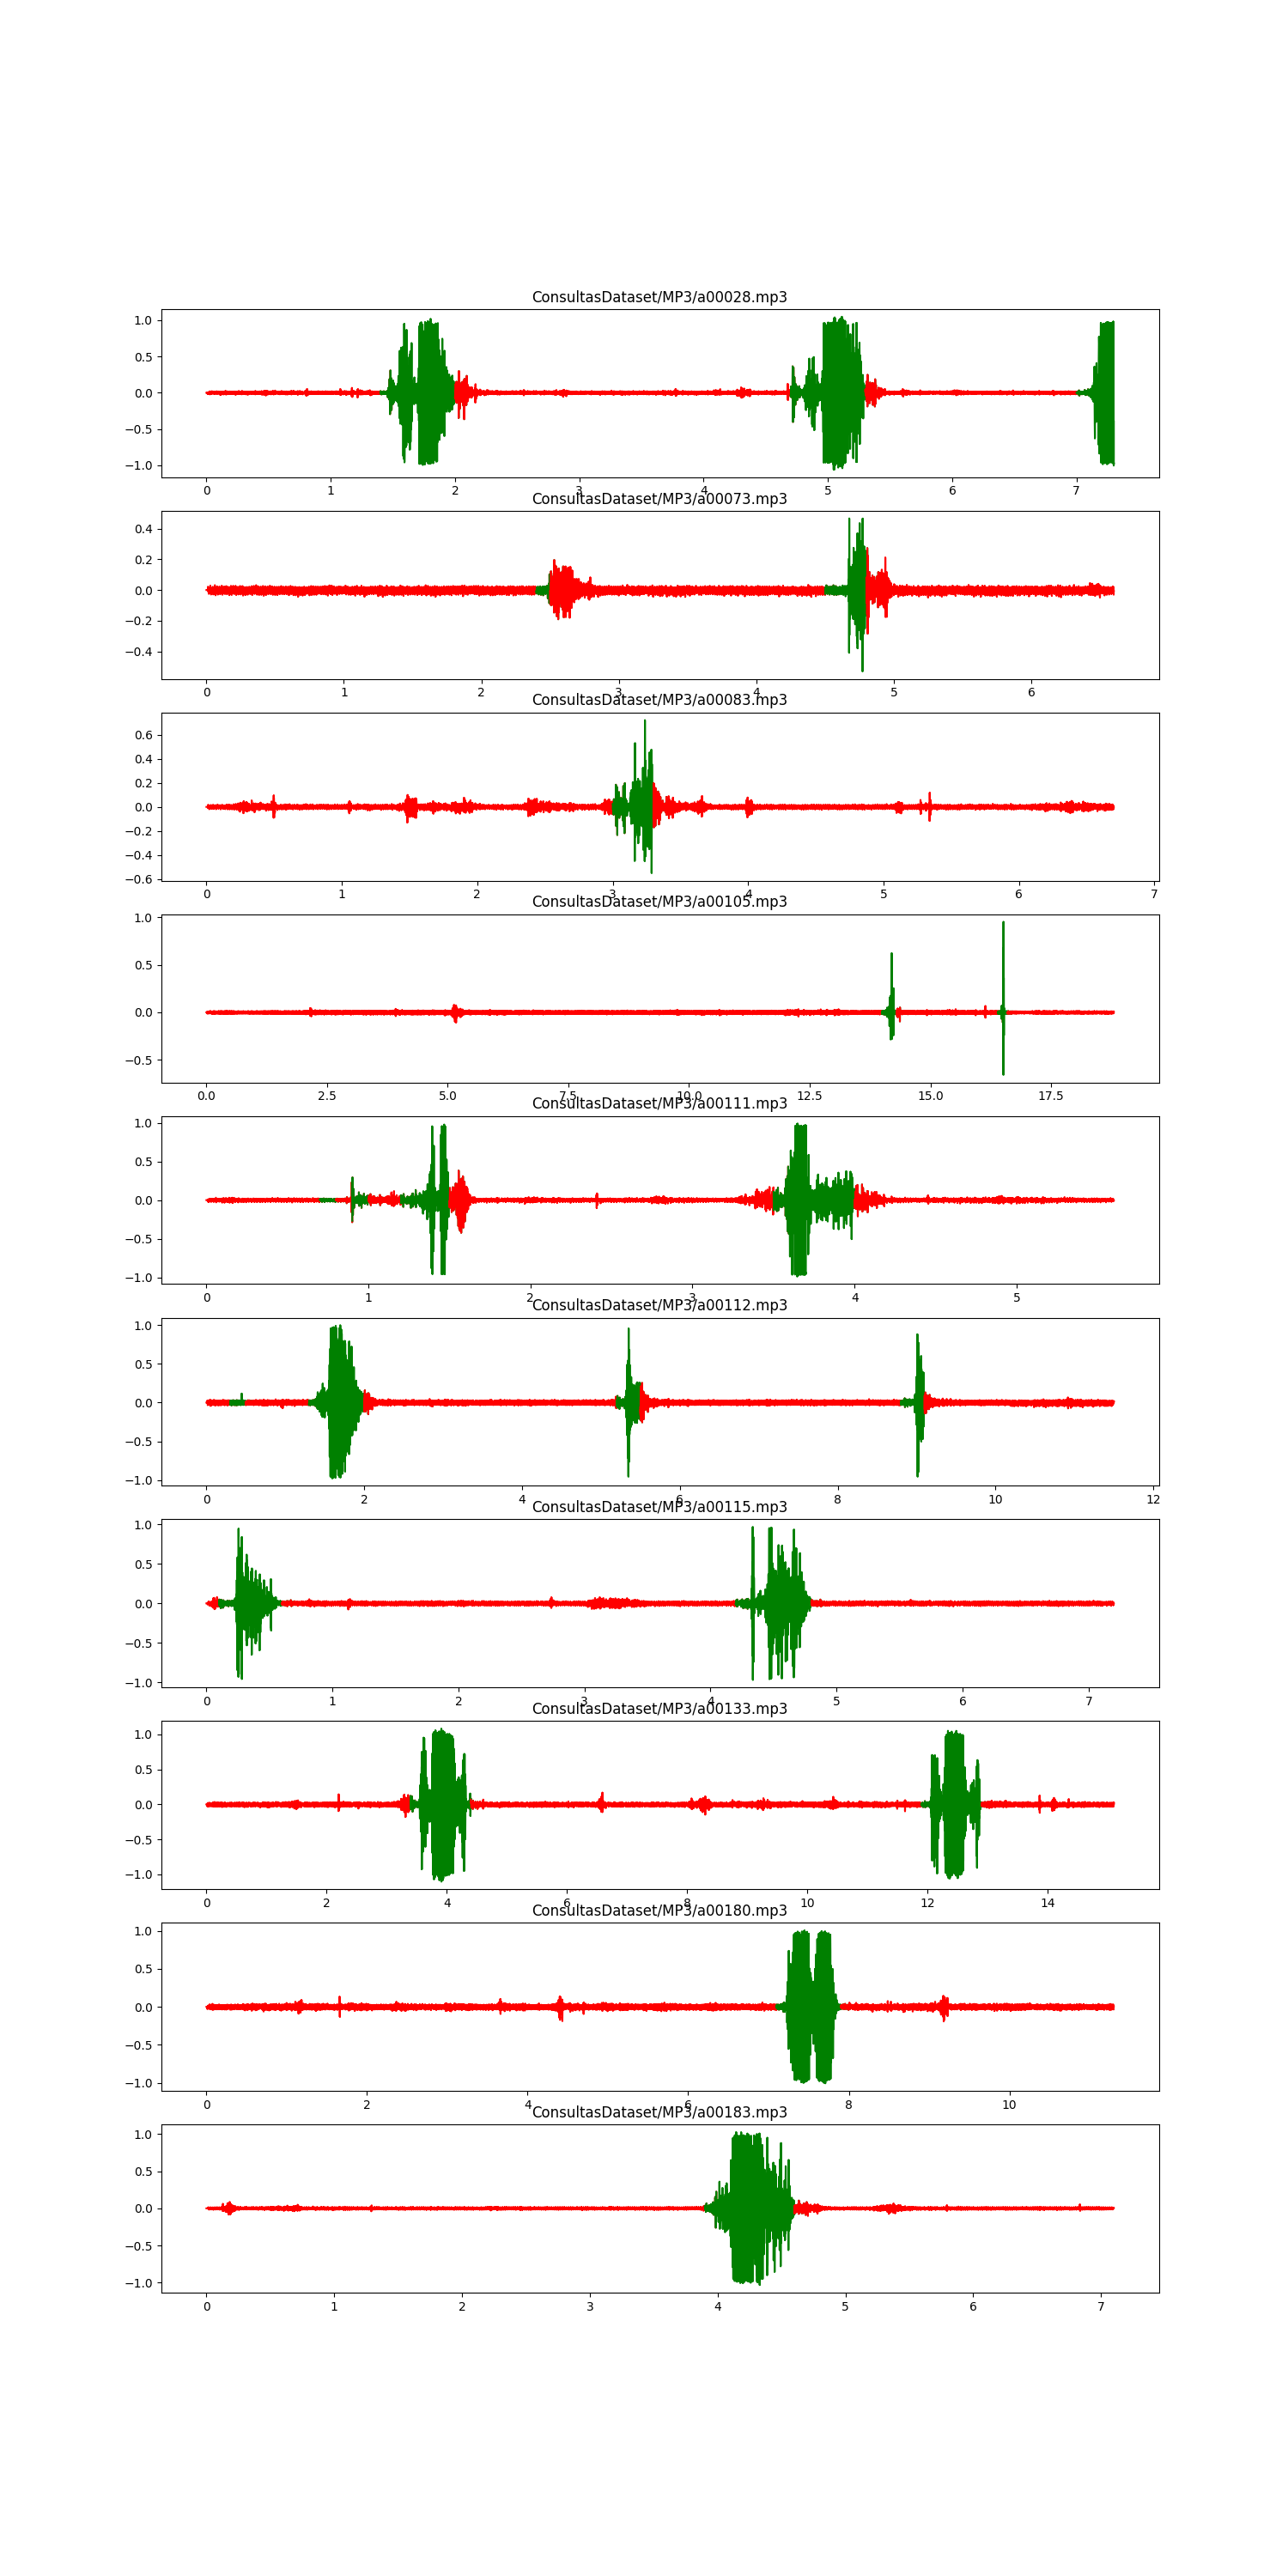

In [ ]:
# detector de anomalias
from sklearn.ensemble import IsolationForest

X = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X.append(y)

ano = clf.predict(df_isolation)
ano = (ano == -1)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color='green' if ano[n] else 'red')
plt.show()

# Usando o espectograma

In [ ]:
# detector de anomalias
import pandas as pd
import warnings
from sklearn.ensemble import IsolationForest
warnings.filterwarnings('ignore')

deteccao = []
count = 0

for linha in tqdm(dados):
    for x, y in linha:                
        atributos = [nomes[count]]
        spectrogram = np.abs(librosa.stft(segment))
        
        # Flatten the spectrogram
        flattened_spectrogram = spectrogram.flatten()
        atributos.extend(flattened_spectrogram)


        deteccao.append(atributos)
    
    #incremento o contador
    count += 1

warnings.filterwarnings('default')

df = pd.DataFrame(deteccao)
df.head(10)

100%|██████████| 10/10 [00:02<00:00,  3.53it/s]


,0,1,2,3,4,5,6,7,8,9,...,22541,22542,22543,22544,22545,22546,22547,22548,22549,22550
0,a00028,0.008603,0.097339,0.023392,0.023298,0.04041,0.069685,0.131057,0.121864,0.0568,...,5.221984e-07,0.000001,0.000002,2.673037e-07,4.838414e-07,0.000001,0.000002,2.554421e-07,0.000101,0.000608
1,a00028,0.008603,0.097339,0.023392,0.023298,0.04041,0.069685,0.131057,0.121864,0.0568,...,5.221984e-07,0.000001,0.000002,2.673037e-07,4.838414e-07,0.000001,0.000002,2.554421e-07,0.000101,0.000608
2,a00028,0.008603,0.097339,0.023392,0.023298,0.04041,0.069685,0.131057,0.121864,0.0568,...,5.221984e-07,0.000001,0.000002,2.673037e-07,4.838414e-07,0.000001,0.000002,2.554421e-07,0.000101,0.000608
3,a00028,0.008603,0.097339,0.023392,0.023298,0.04041,0.069685,0.131057,0.121864,0.0568,...,5.221984e-07,0.000001,0.000002,2.673037e-07,4.838414e-07,0.000001,0.000002,2.554421e-07,0.000101,0.000608
4,a00028,0.008603,0.097339,0.023392,0.023298,0.04041,0.069685,0.131057,0.121864,0.0568,...,5.221984e-07,0.000001,0.000002,2.673037e-07,4.838414e-07,0.000001,0.000002,2.554421e-07,0.000101,0.000608
5,a00028,0.008603,0.097339,0.023392,0.023298,0.04041,0.069685,0.131057,0.121864,0.0568,...,5.221984e-07,0.000001,0.000002,2.673037e-07,4.838414e-07,0.000001,0.000002,2.554421e-07,0.000101,0.000608
6,a00028,0.008603,0.097339,0.023392,0.023298,0.04041,0.069685,0.131057,0.121864,0.0568,...,5.221984e-07,0.000001,0.000002,2.673037e-07,4.838414e-07,0.000001,0.000002,2.554421e-07,0.000101,0.000608
7,a00028,0.008603,0.097339,0.023392,0.023298,0.04041,0.069685,0.131057,0.121864,0.0568,...,5.221984e-07,0.000001,0.000002,2.673037e-07,4.838414e-07,0.000001,0.000002,2.554421e-07,0.000101,0.000608
8,a00028,0.008603,0.097339,0.023392,0.023298,0.04041,0.069685,0.131057,0.121864,0.0568,...,5.221984e-07,0.000001,0.000002,2.673037e-07,4.838414e-07,0.000001,0.000002,2.554421e-07,0.000101,0.000608
9,a00028,0.008603,0.097339,0.023392,0.023298,0.04041,0.069685,0.131057,0.121864,0.0568,...,5.221984e-07,0.000001,0.000002,2.673037e-07,4.838414e-07,0.000001,0.000002,2.554421e-07,0.000101,0.000608


/home/matheus/.local/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


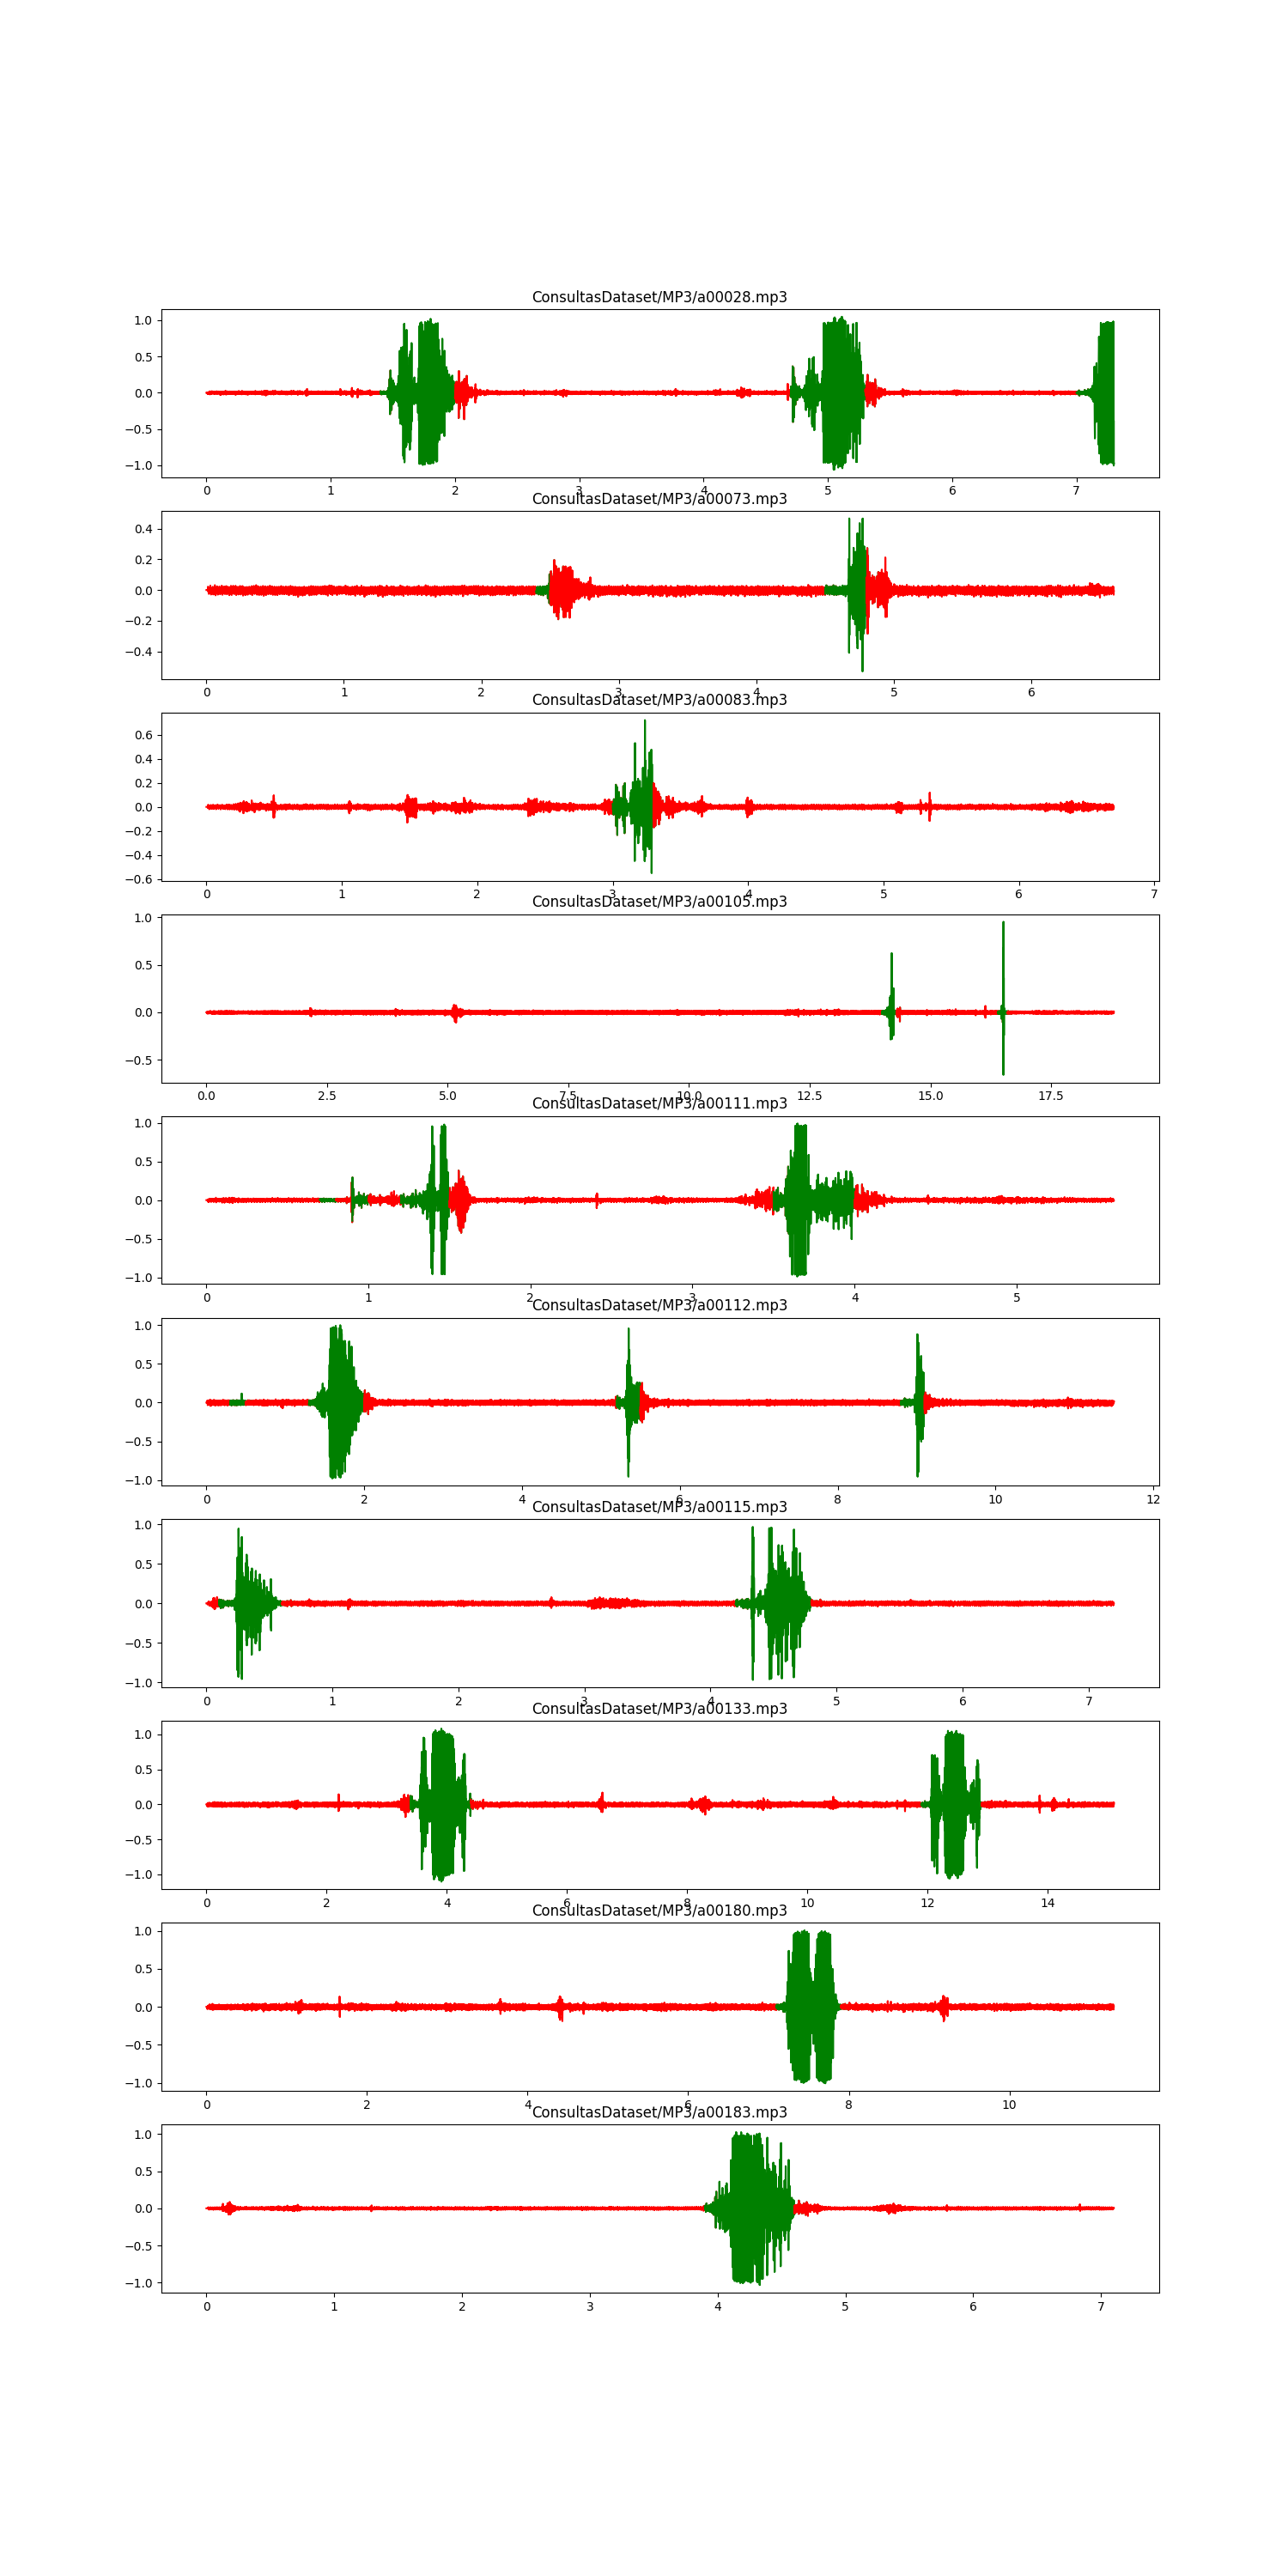

In [ ]:
# detector de anomalias
from sklearn.ensemble import IsolationForest

X = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X.append(y)

ano = clf.predict(df_isolation)
ano = (ano == -1)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color='green' if ano[n] else 'red')
plt.show()